In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Daten einlesen

In [2]:
df=pd.read_csv('C:/Users/kuimi/Documents/Master_Freiberg/Formation_Professionnelle/Data Sciences/Code_Souces/Projets_Portfolio/Marketing_Campaign/marketing_campaign.csv', sep =';')
df.shape

(2240, 29)

# Überblick über die Daten

In [3]:
df.describe(include ='all')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Prüfung auf fehlende Werte

In [5]:
print("Fehlende Werte pro spalte") 
df.isnull().sum().sort_values(ascending=False)

Fehlende Werte pro spalte


Income                 24
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Datenbereinigung: Altersberechnung aus Geburtsjahr

In [7]:
from datetime import datetime
df['Age'] = datetime.now().year - df['Year_Birth'] 
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.dropna()
df = df[df['Income'] < df['Income'].quantile(0.99)]

# Statistische Verteilung : Alterverteilung

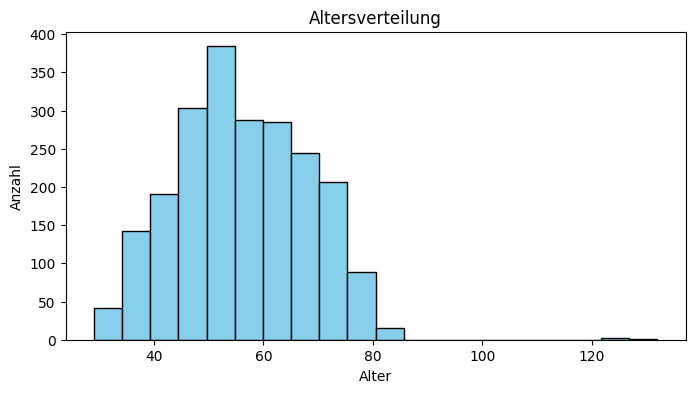

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Altersverteilung")
plt.xlabel("Alter")
plt.ylabel("Anzahl")
plt.show()

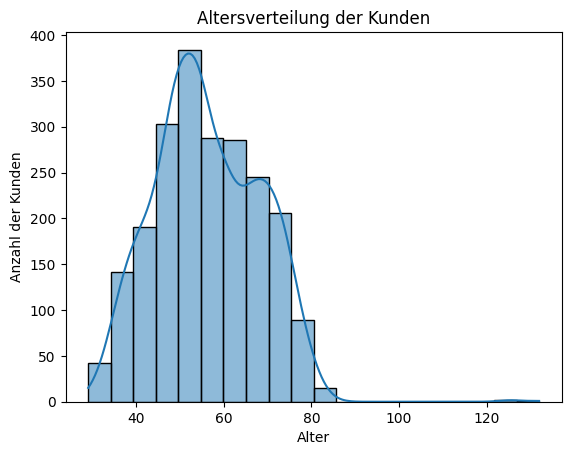

In [9]:
sns.histplot(df['Age'], bins = 20, kde = True) 
plt.title('Altersverteilung der Kunden')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Kunden') 
plt.show() 

# Untersuchung : Einkommen und Ausgaben

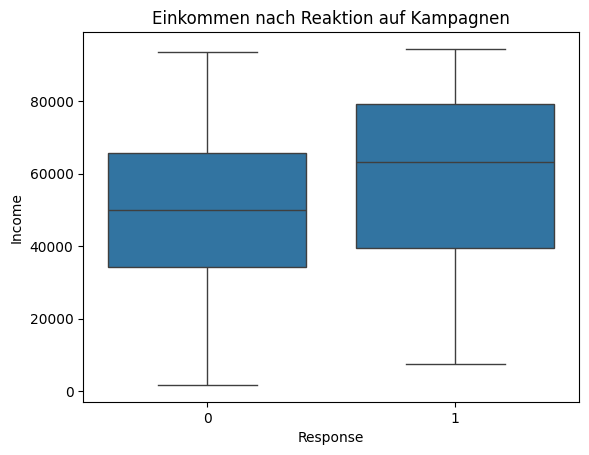

In [10]:
sns.boxplot(x='Response', y='Income', data=df) 
plt.title('Einkommen nach Reaktion auf Kampagnen') 
plt.show() 

# Durchschnittliches Einkommen nach Bildungsniveau

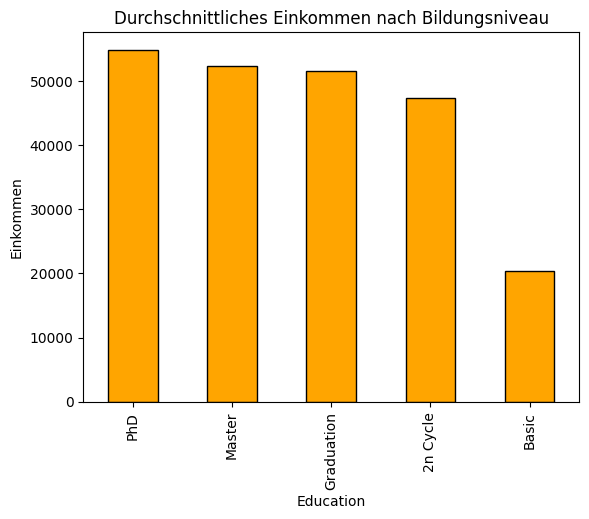

In [11]:
edu_income = df.groupby('Education')['Income'].mean().sort_values(ascending=False)
edu_income.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Durchschnittliches Einkommen nach Bildungsniveau")
plt.ylabel("Einkommen")
plt.show()

# Aggregation : Durchschnittliche Ausgaben nach Kinderanzahl

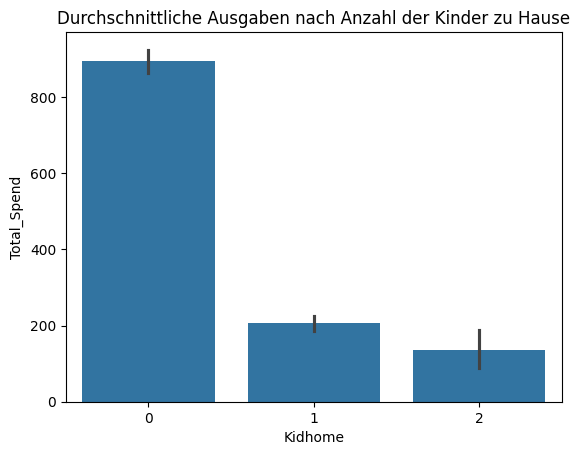

In [12]:
df['Total_Spend'] = df [['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1) 
sns.barplot(x='Kidhome', y='Total_Spend', data=df) 
plt.title('Durchschnittliche Ausgaben nach Anzahl der Kinder zu Hause') 
plt.show() 

# Segmentierung nach Bildung und Marital Status

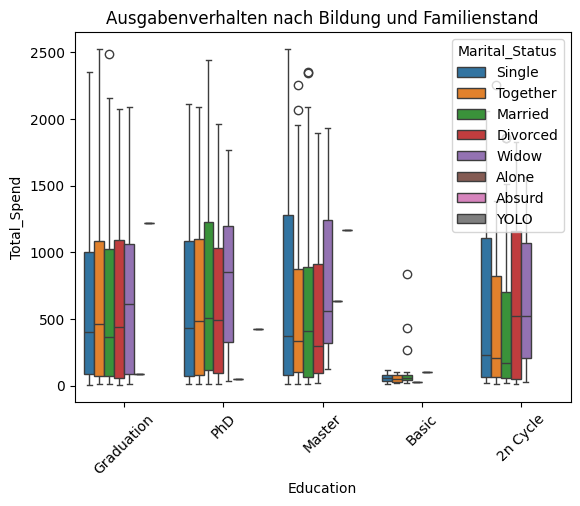

In [13]:
sns.boxplot(x='Education', y='Total_Spend', hue='Marital_Status', data=df) 
plt.xticks(rotation=45) 
plt.title('Ausgabenverhalten nach Bildung und Familienstand')  
plt.show() 

# Korrelation zwischen numerischen Variablen

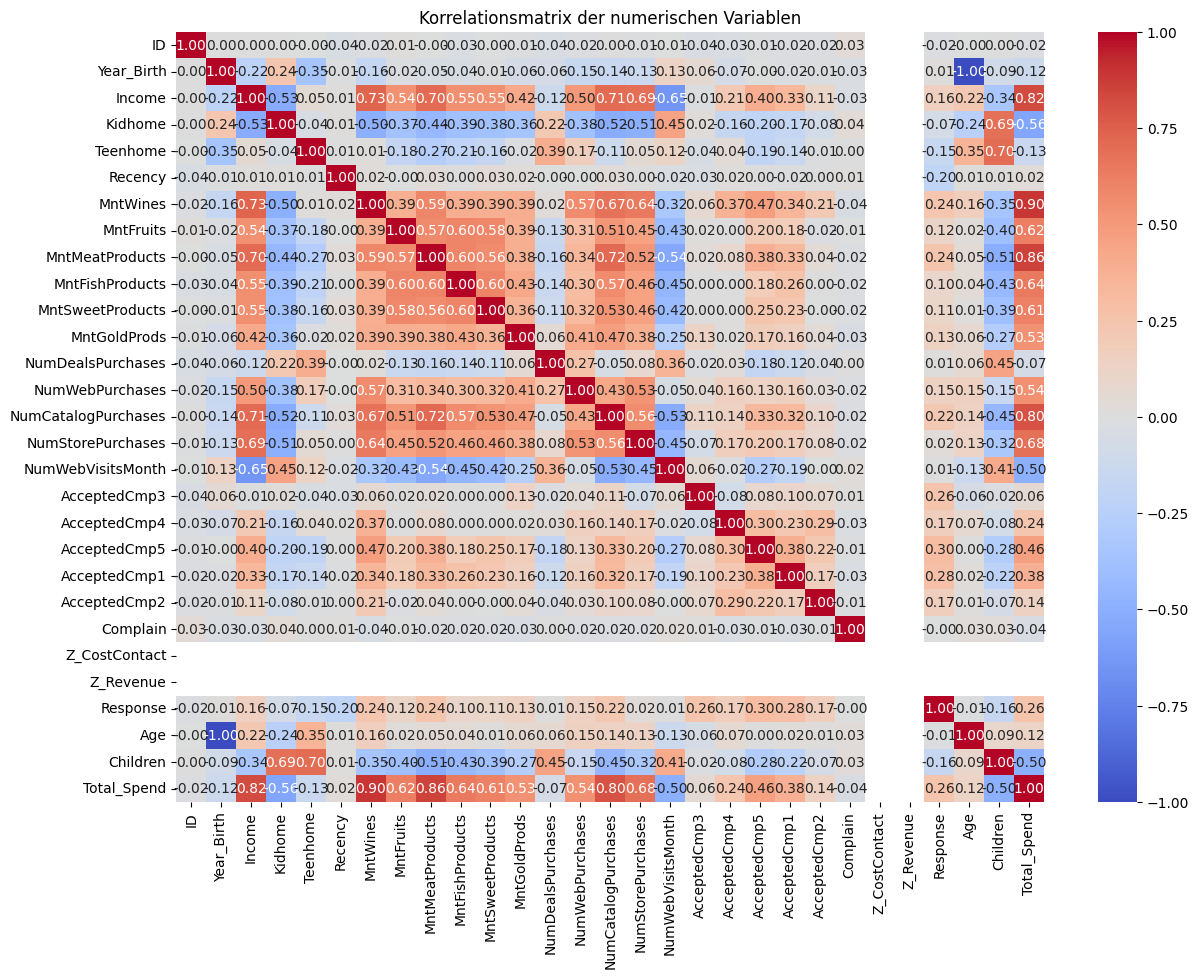

In [14]:
numerics = df.select_dtypes(include=['int64', 'float64']) 
plt.figure(figsize=(14, 10)) 
sns.heatmap(numerics.corr(), annot=True, fmt='.2f', cmap='coolwarm') 
plt.title('Korrelationsmatrix der numerischen Variablen')
plt.show() 

# Heatmap der Produktausgaben

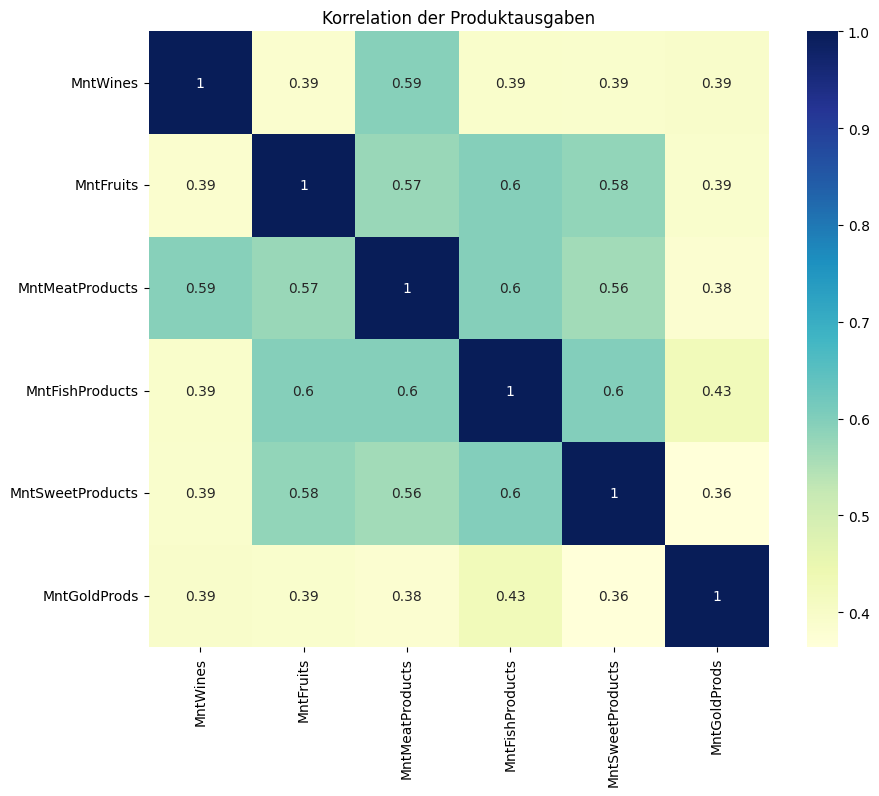

In [15]:
mnt_cols = [col for col in df.columns if col.startswith('Mnt')]
plt.figure(figsize=(10, 8))
sns.heatmap(df[mnt_cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Korrelation der Produktausgaben")
plt.show()

# Analyse der Kundensegmente

Top 10 profitabelste Kunden:


,ID,Age,Education,Income,Total_Spend
1572,5350,34,Master,90638.0,2525
1179,5735,34,Master,90638.0,2525
1492,1763,37,Graduation,87679.0,2524
987,4580,56,Graduation,75759.0,2486
1052,4475,76,PhD,69098.0,2440
1601,5453,69,Master,90226.0,2352
1458,10133,55,Graduation,93790.0,2349
1288,9010,53,Master,83151.0,2346
1301,6024,72,Graduation,94384.0,2302
943,5386,72,Graduation,94384.0,2302


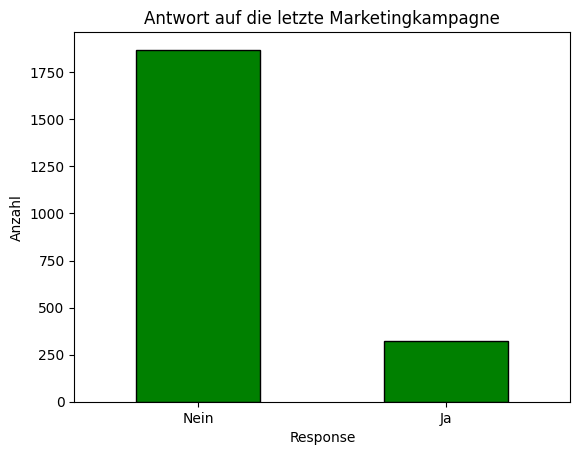

In [16]:
# Top 10 profitabelste Kunden
top_clients = df.sort_values(by='Total_Spend', ascending=False).head(10)[['ID', 'Age', 'Education', 'Income', 'Total_Spend']]
print("Top 10 profitabelste Kunden:")
display(top_clients)

# Antwort auf letzte Marketingkampagne
campaign_counts = df['Response'].value_counts().rename({0: 'Nein', 1: 'Ja'})
campaign_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title("Antwort auf die letzte Marketingkampagne")
plt.ylabel("Anzahl")
plt.xticks(rotation=0)
plt.show()
